In [1]:
# !pip install scikit-learn

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Будем работать с классическим датасетом о вине.  
Скачать данные файлом, если очень хочется, можно тут: [ссылка](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data).  

У нас есть различные числовые данные о трёх видах вина. Вообще, это хороша задача для тренировки классификации объектов. Но мы пока зайдем с другой стороны:
- нам известно, к какому классу относится каждая запись
- проведем описательный анализ

In [3]:
# для загрузки мы пользуемся библиотекой для классического ML - scikit-learn
# загружается отдельно матрица с признаками (features) и целевой столбец (target)
df, target = datasets.load_wine(return_X_y=True, as_frame=True)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [7]:
target.unique()  # это лейблы. здесь всего 3 вида вина.

array([0, 1, 2])

In [8]:
# добавим целевой столбец в наш датафрейм

df["class"] = target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [9]:
df["class"].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

# группировка
## Определить среднее значение в каждом классе для каждого класса вина.

Пример на ирисах Фишера. Мы тоже с ними поработаем, но потом :)  
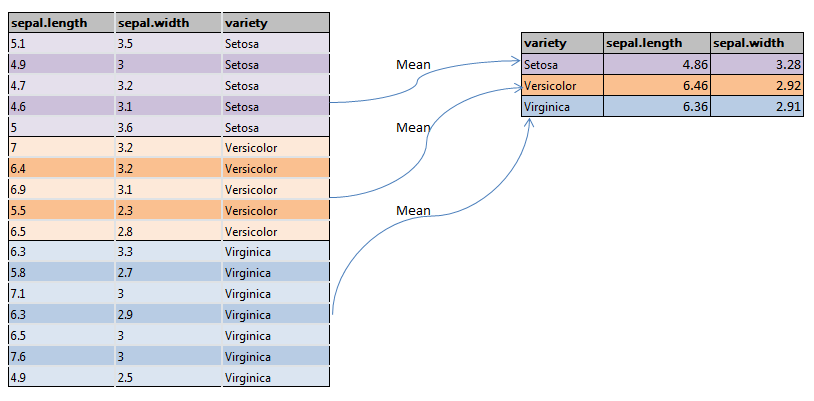

In [10]:
# группировка
print(df.groupby("class"))

In [11]:
# подсчет числа непустых строк для каждого столбца внутри каждй группы
df.groupby("class").count()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59
1,71,71,71,71,71,71,71,71,71,71,71,71,71
2,48,48,48,48,48,48,48,48,48,48,48,48,48


In [12]:
df.groupby(by="class")["flavanoids"].mean()

class
0    2.982373
1    2.080845
2    0.781458
Name: flavanoids, dtype: float64

In [13]:
df["flavanoids"].mean()

2.0292696629213487

In [15]:
df.groupby(by="class")[["flavanoids", "total_phenols"]].mean()

,flavanoids,total_phenols
class,,
0,2.982373,2.840169
1,2.080845,2.258873
2,0.781458,1.678750


In [16]:
# посмотрим на атрибут groups объекта DataFrameGroupBy
df.groupby("class").groups

# какой тип данных мы получили?

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], 1: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 2: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]}

In [16]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [17]:
sample = df.sample(n=100)
sample

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0,0
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,13.39,1.77,2.62,16.1,93.0,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195.0,0
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0,2
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1


In [19]:
sample.groupby("class").groups

{0: [28, 3, 57, 44, 1, 20, 11, 36, 41, 42, 40, 53, 51, 58, 7, 19, 15, 27, 35, 9, 24, 18, 47, 32, 30, 39, 14, 38, 43, 52, 16, 26], 1: [68, 118, 129, 75, 114, 71, 81, 113, 112, 59, 76, 62, 78, 128, 77, 82, 108, 91, 72, 93, 85, 107, 70, 105, 74, 66, 61, 96, 121, 60, 63, 99, 120, 89, 80, 115, 100, 95, 86, 109], 2: [177, 160, 158, 161, 144, 168, 151, 137, 171, 165, 139, 148, 166, 142, 130, 157, 134, 145, 172, 164, 155, 170, 153, 133, 176, 156, 143, 154]}

In [20]:
## получить отдельную группы
df.groupby("class").get_group(1).head(5)  # get_group(ключ)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1


In [23]:
df[df["class"] == 1]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


## АЛГОРИТМ РАБОТЫ
1. Разбиение данных на группы
2. Выполнение операции отдельно к каждой группе
3. Соединение результатов в одну конечную структуру

### Работа без группировки (будет считать среднее для столбца `alcohol`)

In [30]:
avg = {}

for wine_class in df["class"].unique():  # пройдемся по всем классам

    df_temp = df[df["class"] == wine_class]  # отберем строки относящиеся к этому классу

    avg_val = df_temp["alcohol"].mean()

    avg[wine_class] = avg_val

print(avg)

{0: 13.744745762711865, 1: 12.278732394366195, 2: 13.153750000000002}


In [21]:
avg_df = pd.DataFrame.from_dict(avg, orient="index", columns=["avg_alcohol"])
avg_df

,avg_alcohol
0,13.744746
1,12.278732
2,13.153750


Можно и без группировки. Но кода больше. И это был лишь простой запрос.  
Как надо:

In [22]:
df[df["class"] == 0]["alcohol"].mean()

13.744745762711865

In [29]:
dfg = df.groupby("class")
dfg["alcohol"].mean().to_frame()

,alcohol
class,
0,13.744746
1,12.278732
2,13.153750


In [24]:
df.groupby("class")[["alcohol", "flavanoids"]].mean()  # или если хотим датафрейм

,alcohol,flavanoids
class,,
0,13.744746,2.982373
1,12.278732,2.080845
2,13.153750,0.781458


## Базовые функции для агрегирования:
- `.count()`
- `.sum()`
- `.mean()`
- `.median()`
- `.min()`
- `.max()`
- `.std()`
- `.var()`

### Посчитаем минимум и максимум для столбца `total_phenols` по классам

In [31]:
a = df.groupby("class")["total_phenols"].min()
a

class
0    2.20
1    1.10
2    0.98
Name: total_phenols, dtype: float64

In [32]:
b = df.groupby("class")["total_phenols"].max()
b

class
0    3.88
1    3.52
2    2.80
Name: total_phenols, dtype: float64

In [33]:
pd.DataFrame(data={"min": a, "max": b})

,min,max
class,,
0,2.20,3.88
1,1.10,3.52
2,0.98,2.80


In [36]:
# df['total_phenols'].agg(['min', 'max', 'mean'])
df["total_phenols"].agg([np.min, np.max, np.mean])

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\2350889636.py:2: FutureWarning: The provided callable <function min at 0x000002DB44657600> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df['total_phenols'].agg([np.min, np.max, np.mean])
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\2350889636.py:2: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['total_phenols'].agg([np.min, np.max, np.mean])
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\2350889636.py:2: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the strin

min     0.980000
max     3.880000
mean    2.295112
Name: total_phenols, dtype: float64

In [37]:
# Применение нескольких функций сразу:
res = df.groupby("class")["total_phenols"].agg([np.min, np.max, np.mean])
res

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\60793470.py:2: FutureWarning: The provided callable <function min at 0x000002DB44657600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  res = df.groupby('class')['total_phenols'].agg([np.min, np.max, np.mean])
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\60793470.py:2: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby('class')['total_phenols'].agg([np.min, np.max, np.mean])
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\60793470.py:2: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

,min,max,mean
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [38]:
# способ переименовать колонки -- переименовать целиком атрибут
res.columns = ["минимум", "максимум", "среднее"]
res

,минимум,максимум,среднее
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [30]:
# или таргетное одну колонку или несколько
res = res.rename(columns={"минимум": "МиНиМуМммммм"})
res

,МиНиМуМммммм,максимум,среднее
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [39]:
# Применение нескольких функций сразу:
res = df.groupby("class")["total_phenols"].agg(min=np.min, max=np.max, average=np.mean)
res

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\360394246.py:2: FutureWarning: The provided callable <function min at 0x000002DB44657600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  res = df.groupby('class')['total_phenols'].agg(
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\360394246.py:2: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby('class')['total_phenols'].agg(
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\360394246.py:2: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pa

,min,max,average
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [41]:
def razmah(x):
    return x.max() - x.min()

In [47]:
res = df.groupby("class")["total_phenols"].agg(
    Минимум=np.min,
    Максимум=np.max,
    Среднее=np.mean,
    # Размах=razmah,
    Размах=lambda x: x.max() - x.min(),
    Q1=lambda x: x.quantile(0.25),
)
res

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\55347576.py:1: FutureWarning: The provided callable <function min at 0x000002DB44657600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  res = df.groupby('class')['total_phenols'].agg(Минимум=np.min,
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\55347576.py:1: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby('class')['total_phenols'].agg(Минимум=np.min,
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\55347576.py:1: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. 

,Минимум,Максимум,Среднее,Размах,Q1
class,,,,,
0,2.20,3.88,2.840169,1.68,2.6000
1,1.10,3.52,2.258873,2.42,1.8950
2,0.98,2.80,1.678750,1.82,1.4075


In [48]:
res = df.groupby("class").agg({"total_phenols": [np.min, np.max], "alcohol": [np.mean]})
res

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\4071288615.py:1: FutureWarning: The provided callable <function min at 0x000002DB44657600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  res = df.groupby('class').agg({'total_phenols':[np.min, np.max], 'alcohol':[np.mean]})
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\4071288615.py:1: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby('class').agg({'total_phenols':[np.min, np.max], 'alcohol':[np.mean]})
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\4071288615.py:1: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using SeriesGroupBy.mean. In a future version of

total_phenols          alcohol
                min   max       mean
class                               
0              2.20  3.88  13.744746
1              1.10  3.52  12.278732
2              0.98  2.80  13.153750

In [49]:
res["total_phenols"]

,min,max
class,,
0,2.20,3.88
1,1.10,3.52
2,0.98,2.80


In [50]:
res["total_phenols"]["min"]

class
0    2.20
1    1.10
2    0.98
Name: min, dtype: float64

In [52]:
res = df.groupby("class").agg(
    {
        "total_phenols": [("мин", np.min), ("макс", np.max)],
        "alcohol": [("ср.знач.", np.mean)],
    }
)
res

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\2067331527.py:1: FutureWarning: The provided callable <function min at 0x000002DB44657600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  res = df.groupby('class').agg({'total_phenols':[('мин', np.min), ('макс', np.max)], 'alcohol':[('ср.знач.', np.mean)]})
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\2067331527.py:1: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res = df.groupby('class').agg({'total_phenols':[('мин', np.min), ('макс', np.max)], 'alcohol':[('ср.знач.', np.mean)]})
C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\2067331527.py:1: FutureWarning: The provided callable <function mean at 0x000002DB44657

total_phenols          alcohol
                мин  макс   ср.знач.
class                               
0              2.20  3.88  13.744746
1              1.10  3.52  12.278732
2              0.98  2.80  13.153750

## кастомная функция для агрегирования

In [53]:
df["alcohol"].apply(np.sqrt)

0      3.772267
1      3.633180
2      3.627671
3      3.790778
4      3.638681
         ...   
173    3.702702
174    3.660601
175    3.642801
176    3.629049
177    3.758989
Name: alcohol, Length: 178, dtype: float64

In [55]:
df["alcohol"].apply(lambda x: x**2 - 3)

179 µs ± 9.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [56]:
df["alcohol"] ** 2 - 3

176 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [57]:
# применять агрегирующие функции через apply не надо, их можно и так применить, без apply
df.groupby("class")["alcohol"].apply(np.mean)

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [58]:
df.groupby("class")["alcohol"].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [59]:
# посчитаем range
df.groupby("class")["alcohol"].apply(lambda x: x.max() - x.min())

class
0    1.98
1    2.83
2    2.14
Name: alcohol, dtype: float64

In [60]:
df.groupby("class")["alcohol"].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

class
0    0.7
1    0.6
2    0.7
Name: alcohol, dtype: float64

In [61]:
df.groupby("class").apply(
    lambda x: x["alcohol"].quantile(0.75) - x["alcohol"].quantile(0.25)
)

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\3741989863.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("class").apply(lambda x: x["alcohol"].quantile(0.75) - x["alcohol"].quantile(0.25))


class
0    0.7
1    0.6
2    0.7
dtype: float64

In [63]:
df.groupby("class")[["alcohol", "flavanoids"]].apply(
    lambda x: x["alcohol"].mean() - x["flavanoids"].mean()
)

class
0    10.762373
1    10.197887
2    12.372292
dtype: float64

In [38]:
# через agg можно указать много функций
df.groupby("class")["alcohol"].agg(
    minimum=np.min,
    maximum=np.max,
    minmax_range=lambda x: x.max() - x.min(),
    q5=lambda x: x.quantile(0.05),
    q95=lambda x: x.quantile(0.95),
)

,minimum,maximum,minmax_range,q5,q95
class,,,,,
0,12.85,14.83,1.98,13.0500,14.3810
1,11.03,13.86,2.83,11.5100,13.2250
2,12.20,14.34,2.14,12.2885,14.0425


## apply VS transform

In [70]:
df.groupby("class").alcohol.mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [69]:
pd.merge(
    df,
    df.groupby("class").alcohol.mean(),
    left_on="class",
    right_index=True,
    suffixes=["", "_class_mean"],
)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_class_mean
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,13.153750
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,13.153750
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,13.153750
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,13.153750


### apply 
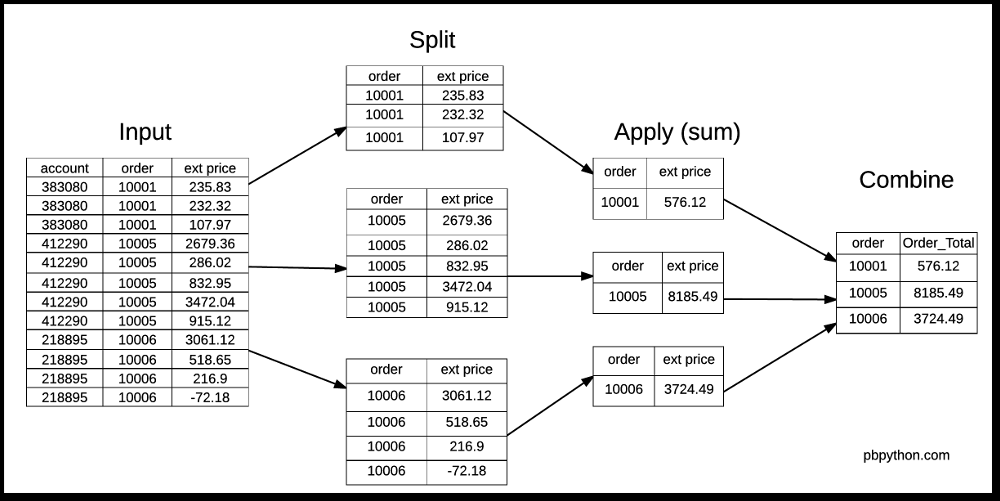

## transform
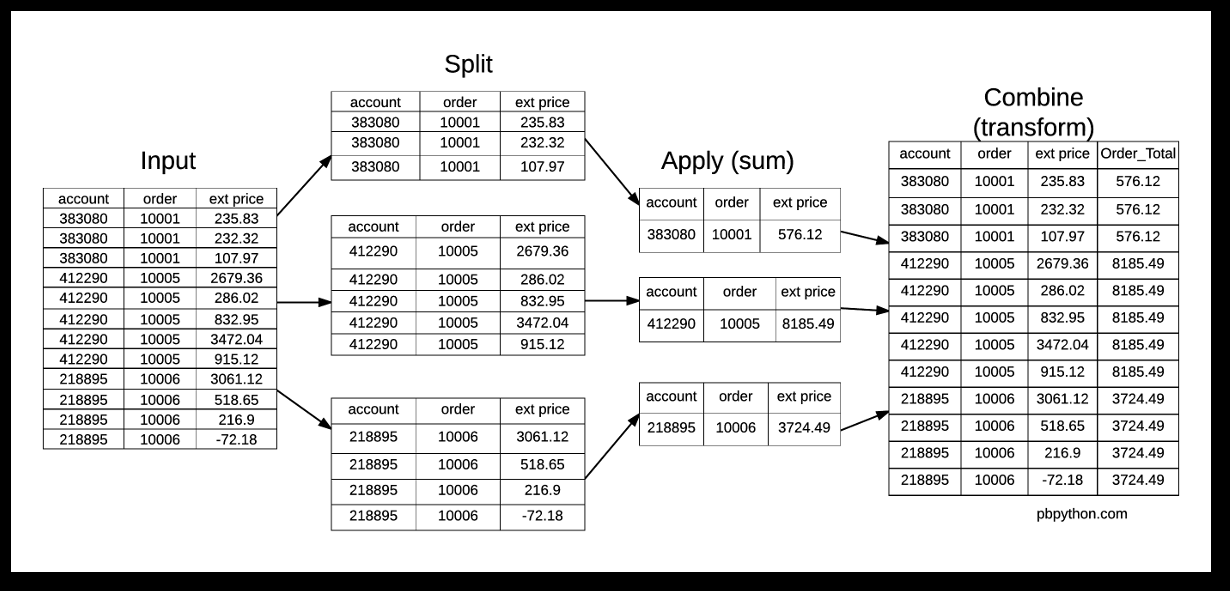

In [71]:
# создаёт колонку такой же размерности, как исходный датафрейм
df.groupby("class")["alcohol"].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [73]:
df.sample(frac=1).groupby("class")["alcohol"].transform("mean")

98     12.278732
177    13.153750
17     13.744746
173    13.153750
42     13.744746
         ...    
111    12.278732
163    13.153750
139    13.153750
58     13.744746
108    12.278732
Name: alcohol, Length: 178, dtype: float64

In [74]:
# создаёт колонку такой же размерности, как исходный датафрейм
df["alcohol_group_mean"] = df.groupby("class")["alcohol"].transform(np.mean)
df.sample(n=30)

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\1795694078.py:2: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df["alcohol_group_mean"] = df.groupby("class")["alcohol"].transform(np.mean)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.800,3.39,625.0,1,12.278732
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.250,1.67,680.0,1,12.278732
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.580,1.33,415.0,2,13.153750
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.130,2.57,1130.0,0,13.744746
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.740,1.42,530.0,2,13.153750
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.950,2.26,625.0,1,12.278732
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.060,2.31,750.0,1,12.278732
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.050,1.82,520.0,1,12.278732
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718.0,1,12.278732
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.890,3.53,760.0,0,13.744746


In [75]:
df["alcohol_pct_of_mean"] = ((df["alcohol"] / df["alcohol_group_mean"]) * 100).round(1)
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5


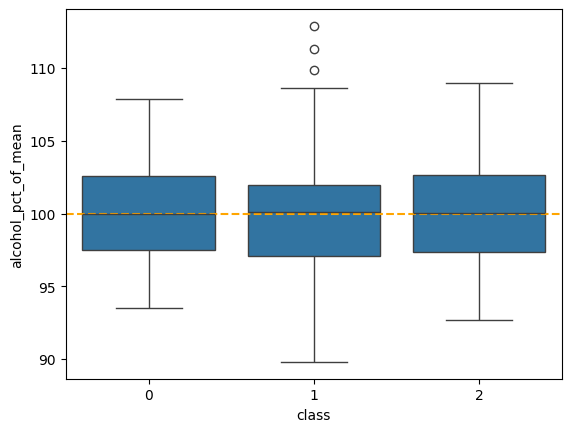

In [79]:
sns.boxplot(data=df, x="class", y="alcohol_pct_of_mean")
plt.axhline(100, linestyle="--", color="orange")

<Axes: xlabel='alcohol_pct_of_mean', ylabel='Density'>

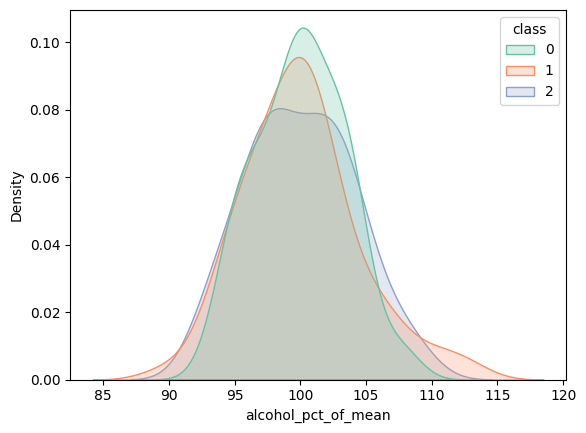

In [83]:
sns.kdeplot(
    data=df,
    x="alcohol_pct_of_mean",
    hue="class",
    common_norm=False,
    fill=True,
    palette="Set2",
)

In [46]:
df.groupby("class")[["alcohol"]].mean()

,alcohol
class,
0,13.744746
1,12.278732
2,13.153750


In [84]:
df = pd.merge(
    df,
    df.groupby("class")[["alcohol"]].mean(),
    left_on="class",
    right_index=True,
    suffixes=["", "_group_mean_2"],
    how="left",
    validate="m:1",
)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,104.5,13.744746
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,96.3,13.744746


In [85]:
df.groupby("class")["magnesium"].transform(lambda x: x.max())

0      132.0
1      132.0
2      132.0
3      132.0
4      132.0
       ...  
173    123.0
174    123.0
175    123.0
176    123.0
177    123.0
Name: magnesium, Length: 178, dtype: float64

In [86]:
df["class_mean"] = df.groupby("class")["alcohol"].transform(np.mean)
df.head(3)

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\950787583.py:1: FutureWarning: The provided callable <function mean at 0x000002DB44657EC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df["class_mean"] = df.groupby("class")["alcohol"].transform(np.mean)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746


Найдем процент содержания алкоголя от максимакльного в рамках группы.  
То есть $ \frac{\%\ алкоголя}{\%\ алкоголя\ макс.\ в\ рамках\ класса} $ 

In [50]:
df.groupby("class")["alcohol"].max()  # возвращает по строке на каждую исходную строку

class
0    14.83
1    13.86
2    14.34
Name: alcohol, dtype: float64

In [87]:
df.groupby("class")["alcohol"].transform(
    np.max
)  # возвращает по строке на каждую исходную строку

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\3170269621.py:1: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("class")["alcohol"].transform(


0      14.83
1      14.83
2      14.83
3      14.83
4      14.83
       ...  
173    14.34
174    14.34
175    14.34
176    14.34
177    14.34
Name: alcohol, Length: 178, dtype: float64

In [88]:
df["max_group_alco"] = df.groupby("class")["alcohol"].transform(np.max)
df.sample(30)

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\99936675.py:1: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df["max_group_alco"] = df.groupby("class")["alcohol"].transform(np.max)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.300000,1.270,2.96,710.0,1,12.278732,98.4,12.278732,12.278732,13.86
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.260000,0.720,1.75,685.0,2,13.153750,97.5,13.153750,13.153750,14.34
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.800000,0.840,2.01,515.0,1,12.278732,106.3,12.278732,12.278732,13.86
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.200000,1.070,2.65,1280.0,0,13.744746,104.0,13.744746,13.744746,14.83
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.700000,1.190,2.71,1285.0,0,13.744746,99.9,13.744746,13.744746,14.83
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.940000,1.040,3.57,672.0,1,12.278732,101.9,12.278732,12.278732,13.86
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.500000,1.250,3.40,915.0,0,13.744746,100.9,13.744746,13.744746,14.83
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.730,1.58,695.0,2,13.153750,95.8,13.153750,13.153750,14.34
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.050000,0.906,1.82,870.0,1,12.278732,100.1,12.278732,12.278732,13.86
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,0.740,1.42,530.0,2,13.153750,97.9,13.153750,13.153750,14.34


In [89]:
df["percent_alcohol"] = df["alcohol"] / df["max_group_alco"]
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746,14.83,0.959541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746,14.83,0.890088
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746,14.83,0.887390
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,104.5,13.744746,13.744746,14.83,0.968982
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,96.3,13.744746,13.744746,14.83,0.892785
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,13.744746,103.3,13.744746,13.744746,14.83,0.957519
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,104.7,13.744746,13.744746,14.83,0.970330
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,13.744746,102.3,13.744746,13.744746,14.83,0.948078
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,107.9,13.744746,13.744746,14.83,1.000000
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,13.744746,100.8,13.744746,13.744746,14.83,0.934592


In [90]:
df["percent_alcohol"] = df["alcohol"] / df.groupby("class")["alcohol"].transform(np.max)
df.head(10)

C:\Users\igumn\AppData\Local\Temp\ipykernel_7204\1136183286.py:1: FutureWarning: The provided callable <function max at 0x000002DB446574C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df["percent_alcohol"] = df["alcohol"] / df.groupby("class")["alcohol"].transform(np.max)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,alcohol_group_mean,alcohol_pct_of_mean,alcohol_group_mean_2,class_mean,max_group_alco,percent_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,103.5,13.744746,13.744746,14.83,0.959541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,96.0,13.744746,13.744746,14.83,0.890088
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,95.7,13.744746,13.744746,14.83,0.887390
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,104.5,13.744746,13.744746,14.83,0.968982
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,96.3,13.744746,13.744746,14.83,0.892785
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,13.744746,103.3,13.744746,13.744746,14.83,0.957519
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,104.7,13.744746,13.744746,14.83,0.970330
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,13.744746,102.3,13.744746,13.744746,14.83,0.948078
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,107.9,13.744746,13.744746,14.83,1.000000
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,13.744746,100.8,13.744746,13.744746,14.83,0.934592


* apply
* agg
* transform

### `.rank()`

In [91]:
df, target = datasets.load_wine(return_X_y=True, as_frame=True)
df["class"] = target

In [92]:
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


In [98]:
df.nlargest(10, columns=["alcohol"])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,rank_alcohol
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,1.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0,2.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,3.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0,4.5
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0,4.5
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,6.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2,1.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0,7.0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,8.0
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,0,9.5


In [99]:
df["rank_alcohol"] = df.groupby("class")["alcohol"].rank(ascending=False)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,49.5


In [100]:
df[df.rank_alcohol <= 3]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,rank_alcohol
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,3.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,1.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0,2.0
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1,2.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1,1.0
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,1,3.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2,1.0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2,2.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,2,3.0


In [101]:
df.sort_values(by="alcohol", ascending=False)[
    ["class", "alcohol", "rank_alcohol"]
].head(10)

,class,alcohol,rank_alcohol
8,0,14.83,1.0
13,0,14.75,2.0
6,0,14.39,3.0
46,0,14.38,4.5
14,0,14.38,4.5
3,0,14.37,6.0
158,2,14.34,1.0
16,0,14.30,7.0
0,0,14.23,8.0
56,0,14.22,9.5


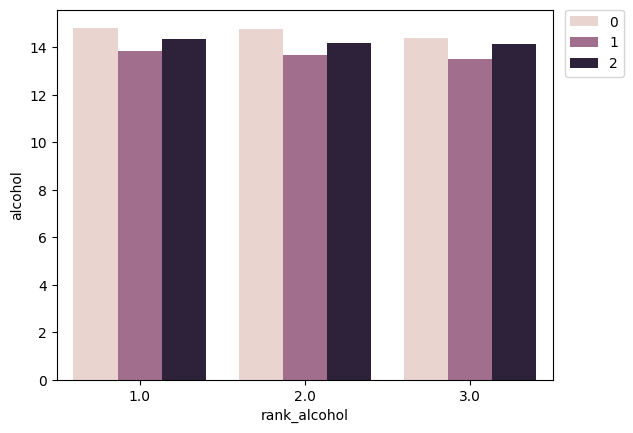

In [102]:
sns.barplot(
    data=df[df["rank_alcohol"] <= 3], x="rank_alcohol", hue="class", y="alcohol"
)
plt.legend(bbox_to_anchor=(1.01, 1.02))

In [124]:
df.groupby("class").nlargest(5, columns="alcohol")

AttributeError: 'DataFrameGroupBy' object has no attribute 'nlargest'

In [125]:
df.groupby("class").apply(
    lambda x: x.nlargest(5, columns="alcohol"), include_groups=False
).reset_index()

,class,level_1,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,rank_alcohol
0,0,8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,1.0
1,0,13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,2.0
2,0,6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,3.0
3,0,14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,4.5
4,0,46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,4.5
5,1,71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1.0
6,1,62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,2.0
7,1,72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,3.0
8,1,68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,4.0
9,1,66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,5.0


## Фильтрация

In [59]:
df.shape

(178, 21)

In [123]:
df.groupby("class").color_intensity.mean()

class
0    5.528305
1    3.086620
2    7.396250
Name: color_intensity, dtype: float64

In [128]:
df_2 = df[df.groupby("class").color_intensity.transform("mean") > 5]
df_2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,8.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,17.5
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,21.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,23.5


In [131]:
df_2 = df.groupby("class").filter(lambda x: x["color_intensity"].mean() > 5)
df_2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,8.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,17.5
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,21.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,23.5


In [61]:
df_2["class"].unique()

array([0, 2])

In [62]:
df.groupby("class")["color_intensity"].mean()

class
0    5.528305
1    3.086620
2    7.396250
Name: color_intensity, dtype: float64

In [63]:
(df_2 != df[df.groupby("class")["color_intensity"].transform("mean") > 5]).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
alcohol_group_mean              0
alcohol_pct_of_mean             0
alcohol_group_mean_2            0
class_mean                      0
max_group_alco                  0
percent_alcohol                 0
rank_alcohol                    0
dtype: int64

# ПРАКТИКА

In [132]:
import seaborn as sns

In [134]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [69]:
# посчитайте число машин (записей) для каждого origin
# 1

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [71]:
# найдите среднее значение horsepower для каждого origin

origin
europe     80.56
japan      79.84
usa       119.05
Name: horsepower, dtype: float64

In [72]:
# определите топ-5 model_year по числу машин (записей) # nlargest

,model_year
73,40
78,36
76,34
82,31
75,30


In [73]:
# определите квантили уровня 0.1, 0.5, 0.9 для displacement для каждого числа цилиндров

,q1,q5,q9
cylinders,,,
3,70.0,70.0,77.0
4,85.0,105.0,140.0
5,123.0,131.0,172.6
6,168.0,228.0,250.0
8,302.0,350.0,400.0


In [75]:
# разбейте машины на 3 категории: число лошадиных сил до 80, 80-140, 140+ #
# Проще всего воспользоваться pd.cut
# (можно воспользоваться np.select или np.where)
# посчитайте число машин в каждой группе

,horsepower
"(0.0, 80.0]",119
"(80.0, 140.0]",196
"(140.0, inf]",77


In [77]:
# разбейте машины на 3 категории: число лошадиных сил до 80, 80-140, 140+ #
# посчитайте медианные массу, число лошадиных сил и ускорение (acceleration)

,weight,horsepower,acceleration
horsepower_cohort,,,
"(0.0, 80.0]",2110.0,70.0,17.0
"(80.0, 140.0]",2902.5,97.0,15.5
"(140.0, inf]",4257.0,160.0,12.5


# resample

In [ ]:
!pip install yfinance

In [9]:
import yfinance as yf

In [10]:
start_date = "2007-01-01"  # начало периода
end_date = "2024-05-11"  # конец периода
ticker = "GOOGL MSFT AAPL AMZN"

data = yf.download(ticker, start_date, end_date)
data.head(2)

[*********************100%%**********************]  4 of 4 completed


Price      Adj Close                                  Close                    \
Ticker          AAPL   AMZN      GOOGL       MSFT      AAPL   AMZN      GOOGL   
Date                                                                            
2007-01-03  2.530319  1.935  11.701451  21.397427  2.992857  1.935  11.701451   
2007-01-04  2.586482  1.945  12.093594  21.361593  3.059286  1.945  12.093594   

Price                      High         ...        Low                 Open  \
Ticker           MSFT      AAPL   AMZN  ...      GOOGL       MSFT      AAPL   
Date                                    ...                                   
2007-01-03  29.860001  3.092143  1.953  ...  11.539289  29.400000  3.081786   
2007-01-04  29.809999  3.069643  1.957  ...  11.720470  29.440001  3.001786   

Price                                         Volume                        \
Ticker        AMZN      GOOGL       MSFT        AAPL       AMZN      GOOGL   
Date                                                                         
2007-01-03  1.9340  11.661662  29.910000  1238319600  248102000  307951740   
2007-01-04  1.9295  11.736737  29.700001   847260400  126368000  315188496   

Price                 
Ticker          MSFT  
Date                  
2007-01-03  76935100  
2007-01-04  45774500  

[2 rows x 24 columns]

In [11]:
data.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', 'GOOGL'),
            (   'Volume',  'MSFT')],
           names=['Price', 'Ticker'])

In [12]:
data_unstacked = data.unstack().reset_index()  # сделаем unstack
data_unstacked.columns = ["val_type", "company", "Date", "value"]
data_unstacked.head()

,val_type,company,Date,value
0,Adj Close,AAPL,2007-01-03,2.530319
1,Adj Close,AAPL,2007-01-04,2.586482
2,Adj Close,AAPL,2007-01-05,2.568062
3,Adj Close,AAPL,2007-01-08,2.580745
4,Adj Close,AAPL,2007-01-09,2.795126


In [92]:
data_unstacked.tail(3)

,val_type,company,Date,value
102333,Volume,MSFT,2023-12-06,21182100.0
102334,Volume,MSFT,2023-12-07,23118900.0
102335,Volume,MSFT,2023-12-08,20144800.0


In [85]:
# data_unstacked.to_csv('data_unstacked_yfinance.tsv', sep='\t', index=False, encoding='utf8')

### datetime колонки
коротко тут
https://www.marsja.se/pandas-convert-column-to-datetime/

In [ ]:
# data_unstacked.read_csv("./data_unstacked_yfinance.tsv", sep='\t', encoding='utf8')

In [22]:
# df = data_unstacked[data_unstacked.val_type == "Adj Close"].pivot(
#     index="Date", values="value", columns="company"
# )
df = data['Adj Close']
df.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-03,2.530319,1.9350,11.701451,21.397427
2007-01-04,2.586482,1.9450,12.093594,21.361593
2007-01-05,2.568062,1.9185,12.191942,21.239769
2007-01-08,2.580745,1.8750,12.101602,21.447582
2007-01-09,2.795126,1.8890,12.149650,21.469082


In [23]:
df.dtypes  # какие типы данных

Ticker
AAPL     float64
AMZN     float64
GOOGL    float64
MSFT     float64
dtype: object

In [24]:
df.index  #

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10'],
              dtype='datetime64[ns]', name='Date', length=4369, freq=None)

In [25]:
df = df.reset_index()
df["Date"] = df["Date"].astype("object")
df.dtypes

Ticker
Date      object
AAPL     float64
AMZN     float64
GOOGL    float64
MSFT     float64
dtype: object

In [26]:
df.head(1)

Ticker,Date,AAPL,AMZN,GOOGL,MSFT
0,2007-01-03 00:00:00,2.530319,1.935,11.701451,21.397427


In [31]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.dtypes

Ticker
Date     datetime64[ns]
AAPL            float64
AMZN            float64
GOOGL           float64
MSFT            float64
dtype: object

In [32]:
df.head(2)

Ticker,Date,AAPL,AMZN,GOOGL,MSFT
0,2007-01-03,2.530319,1.935,11.701451,21.397427
1,2007-01-04,2.586482,1.945,12.093594,21.361593


In [33]:
df["Date"].dt.year # год

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
4364    2024
4365    2024
4366    2024
4367    2024
4368    2024
Name: Date, Length: 4369, dtype: int32

In [34]:
df["Date"].dt.month  # месяц

0       1
1       1
2       1
3       1
4       1
       ..
4364    5
4365    5
4366    5
4367    5
4368    5
Name: Date, Length: 4369, dtype: int32

In [35]:
df["Date"].dt.day  # день

0        3
1        4
2        5
3        8
4        9
        ..
4364     6
4365     7
4366     8
4367     9
4368    10
Name: Date, Length: 4369, dtype: int32

In [36]:
df["Date"].dt.weekday  # день недели :) очень важная штука

0       2
1       3
2       4
3       0
4       1
       ..
4364    0
4365    1
4366    2
4367    3
4368    4
Name: Date, Length: 4369, dtype: int32

In [37]:
df["Date"].dt.weekday.unique()  # почему только 5 дней?

array([2, 3, 4, 0, 1])

In [38]:
# resample -- перевод в другую частоту (были дни, стали недели, месяцы и тд.)
# данные агрегируются
df = df.set_index("Date")  # вернем обратно
df.shape

(4369, 4)

In [39]:
df.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-03,2.530319,1.9350,11.701451,21.397427
2007-01-04,2.586482,1.9450,12.093594,21.361593
2007-01-05,2.568062,1.9185,12.191942,21.239769
2007-01-08,2.580745,1.8750,12.101602,21.447582
2007-01-09,2.795126,1.8890,12.149650,21.469082


In [40]:
df.resample("M")

C:\Users\igumn\AppData\Local\Temp\ipykernel_12220\972756693.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M")


In [41]:
df_month = df.resample("M").max()  # тот же датафрейм, но сагрегирован по месяцу
# подробнее тут https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
df_month.shape

C:\Users\igumn\AppData\Local\Temp\ipykernel_12220\3067288513.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.resample("M").max()  # тот же датафрейм, но сагрегирован по месяцу


(209, 4)

In [42]:
df_month.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-31,2.931910,1.9450,12.637638,22.364824
2007-02-28,2.702731,2.0755,12.055806,21.899036
2007-03-31,2.894166,1.9905,11.636637,20.508053
2007-04-30,3.017058,3.1390,12.074074,21.658577
2007-05-31,3.659301,3.4930,12.477477,22.442934


In [51]:
df_week = df.resample("W").mean()  # тот же датафрейм, но сагрегирован по неделе # подробнее тут
df_week = df_week.reset_index()
df_week

Ticker,Date,AAPL,AMZN,GOOGL,MSFT
0,2007-01-07,2.561621,1.932833,11.995662,21.332930
1,2007-01-14,2.810889,1.880300,12.328629,21.706993
2,2007-01-21,2.790145,1.881750,12.382007,22.280626
3,2007-01-28,2.601700,1.845700,12.226677,22.013694
4,2007-02-04,2.576880,1.882400,12.269970,21.873241
...,...,...,...,...,...
901,2024-04-14,171.265701,186.398001,156.946002,424.791998
902,2024-04-21,168.193869,180.414001,154.965997,408.689996
903,2024-04-28,167.962180,177.329996,160.323999,404.590002
904,2024-05-05,173.672437,181.178003,165.329999,398.203998


In [49]:
df_week['weekday'] = df_week.Date.dt.weekday
df_week.head()

Ticker,Date,AAPL,AMZN,GOOGL,MSFT,weekday
0,2007-01-07,2.561621,1.932833,11.995662,21.332930,6
1,2007-01-14,2.810889,1.880300,12.328629,21.706993,6
2,2007-01-21,2.790145,1.881750,12.382007,22.280626,6
3,2007-01-28,2.601700,1.845700,12.226677,22.013694,6
4,2007-02-04,2.576880,1.882400,12.269970,21.873241,6


In [50]:
df_week['weekday'].map({6: 'Воскресенье', 0:'Понедельник'})

0      Воскресенье
1      Воскресенье
2      Воскресенье
3      Воскресенье
4      Воскресенье
          ...     
901    Воскресенье
902    Воскресенье
903    Воскресенье
904    Воскресенье
905    Воскресенье
Name: weekday, Length: 906, dtype: object

In [127]:
# .dt позволяет применять к датам то же, что умеет библиотека datetime
# https://docs.python.org/3/library/datetime.html
# strftime -- форматирование даты в нужный вид
df_week["Date"].dt.strftime(
    "%d.%m.%Y"
)  # метод strftime форматирует datetime в строку #метод strptime парсит строку и возвращает дату

0      07.01.2007
1      14.01.2007
2      21.01.2007
3      28.01.2007
4      04.02.2007
          ...    
879    12.11.2023
880    19.11.2023
881    26.11.2023
882    03.12.2023
883    10.12.2023
Name: Date, Length: 884, dtype: object

In [128]:
df_week["Date2"] = df_week["Date"].dt.strftime("%m/%d/%Y")
df_week.dtypes  # видим, что Date2 -- object, т.е. строка

company
Date     datetime64[ns]
AAPL            float64
AMZN            float64
GOOGL           float64
MSFT            float64
Date2            object
dtype: object

In [130]:
df_week.head()

company,Date,AAPL,AMZN,GOOGL,MSFT,Date2
0,2007-01-07,2.568369,1.932833,11.995662,21.372382,01/07/2007
1,2007-01-14,2.818293,1.880300,12.328629,21.747136,01/14/2007
2,2007-01-21,2.797494,1.881750,12.382007,22.321824,01/21/2007
3,2007-01-28,2.608553,1.845700,12.226677,22.054405,01/28/2007
4,2007-02-04,2.583668,1.882400,12.269970,21.913694,02/04/2007


In [53]:
df_week_filtered = df_week[
    (df_week["Date"].dt.year >= 2019) & (df_week["Date"].dt.year <= 2023)
]
df_week_filtered

Ticker,Date,AAPL,AMZN,GOOGL,MSFT
626,2019-01-06,36.263916,76.459625,52.539750,95.263103
627,2019-01-13,36.285094,82.422900,53.862401,97.728438
628,2019-01-20,36.888662,83.649699,54.339500,99.764401
629,2019-01-27,36.956155,82.471125,54.356875,100.888561
630,2019-02-03,38.731439,82.471600,54.924200,98.881023
...,...,...,...,...,...
882,2023-12-03,189.650436,146.839999,134.598001,378.016956
883,2023-12-10,192.522879,146.108002,132.440002,370.442957
884,2023-12-17,195.790268,147.919998,132.584003,370.656561
885,2023-12-24,194.675201,153.447998,138.539999,372.241632


In [55]:
df_week_filtered.head(1)

Ticker,Date,AAPL,AMZN,GOOGL,MSFT
626,2019-01-06,36.263916,76.459625,52.53975,95.263103


In [54]:
df_week_filtered.set_index("Date")[["AAPL", "AMZN", "GOOGL", "MSFT"]].head(2)

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-01-06,36.263916,76.459625,52.539750,95.263103
2019-01-13,36.285094,82.422900,53.862401,97.728438


<Axes: xlabel='Date'>

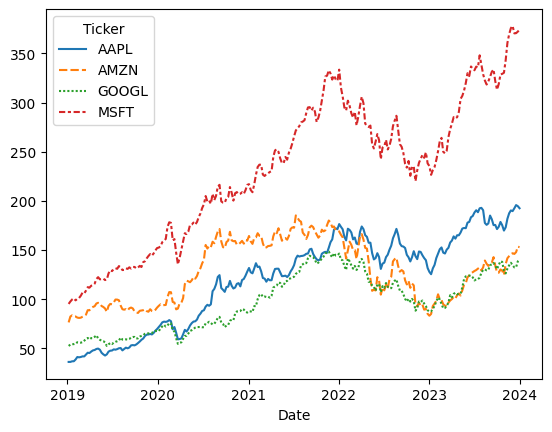

In [56]:
sns.lineplot(df_week_filtered.set_index("Date")[["AAPL", "AMZN", "GOOGL", "MSFT"]])

In [57]:
df_week_filtered.melt(id_vars="Date").head()

,Date,Ticker,value
0,2019-01-06,AAPL,36.263916
1,2019-01-13,AAPL,36.285094
2,2019-01-20,AAPL,36.888662
3,2019-01-27,AAPL,36.956155
4,2019-02-03,AAPL,38.731439


<Axes: xlabel='Date', ylabel='value'>

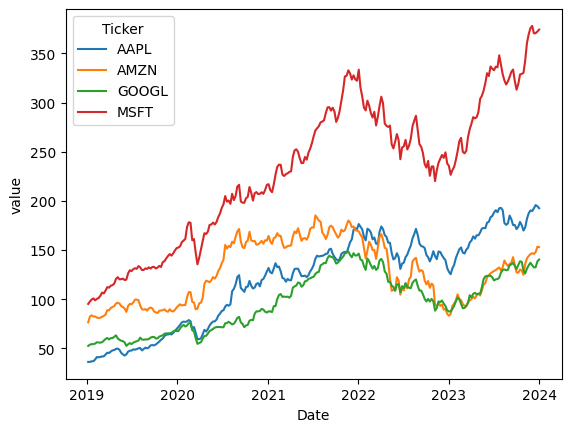

In [58]:
sns.lineplot(
    df_week_filtered.melt(id_vars="Date"),
    x="Date",
    y="value",
    hue="Ticker",
)

## rolling

In [68]:
AAPL = df[["AAPL"]]
AAPL.head()

Ticker,AAPL
Date,
2007-01-03,2.530319
2007-01-04,2.586482
2007-01-05,2.568062
2007-01-08,2.580745
2007-01-09,2.795126


In [69]:
AAPL.rolling(
    window=5,
    min_periods=3,
).mean().head(10)

Ticker,AAPL
Date,
2007-01-03,NaN
2007-01-04,NaN
2007-01-05,2.561621
2007-01-08,2.566402
2007-01-09,2.612147
2007-01-10,2.691861
2007-01-11,2.753096
2007-01-12,2.810889
2007-01-16,2.881122


In [70]:
AAPL = AAPL.join(
    AAPL.rolling(
        window=10,
        min_periods=7,
    ).mean(),
    rsuffix="_MA",
)
AAPL.head(10)

Ticker,AAPL,AAPL_MA
Date,,
2007-01-03,2.530319,NaN
2007-01-04,2.586482,NaN
2007-01-05,2.568062,NaN
2007-01-08,2.580745,NaN
2007-01-09,2.795126,NaN
2007-01-10,2.928890,NaN
2007-01-11,2.892657,2.697469
2007-01-12,2.857026,2.717413
2007-01-16,2.931910,2.741246


''

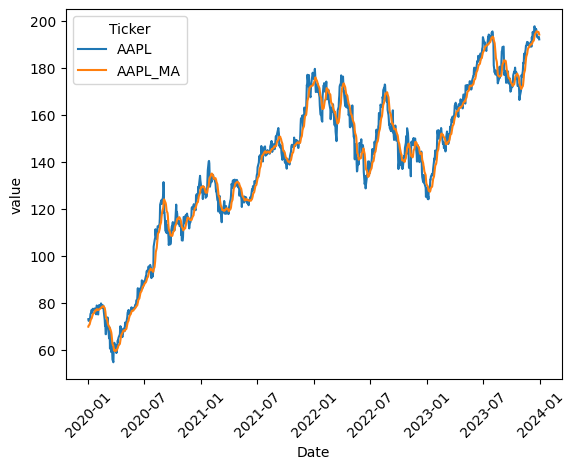

In [72]:
sns.lineplot(
    AAPL[(AAPL.index.year >= 2020) & (AAPL.index.year <= 2023)].reset_index().melt(id_vars='Date'),
    x='Date',
    y='value',
    hue='Ticker'
)
plt.xticks(rotation=45)
;

## shift

In [74]:
df_new = df[df.index.year > 2020]
df_new

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2021-01-04,126.830070,159.331497,86.306503,211.605286
2021-01-05,128.398178,160.925507,87.002502,211.809418
2021-01-06,124.076088,156.919006,86.143997,206.317383
2021-01-07,128.309982,158.108002,88.717003,212.188553
2021-01-08,129.417435,159.134995,89.891502,213.481339
...,...,...,...,...
2024-05-06,181.463882,188.699997,168.100006,413.540009
2024-05-07,182.152924,188.759995,171.250000,409.339996
2024-05-08,182.492477,188.000000,169.380005,410.540009


In [75]:
df_new.shift(1)

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,126.830070,159.331497,86.306503,211.605286
2021-01-06,128.398178,160.925507,87.002502,211.809418
2021-01-07,124.076088,156.919006,86.143997,206.317383
2021-01-08,128.309982,158.108002,88.717003,212.188553
...,...,...,...,...
2024-05-06,183.131607,186.210007,167.240005,406.660004
2024-05-07,181.463882,188.699997,168.100006,413.540009
2024-05-08,182.152924,188.759995,171.250000,409.339996


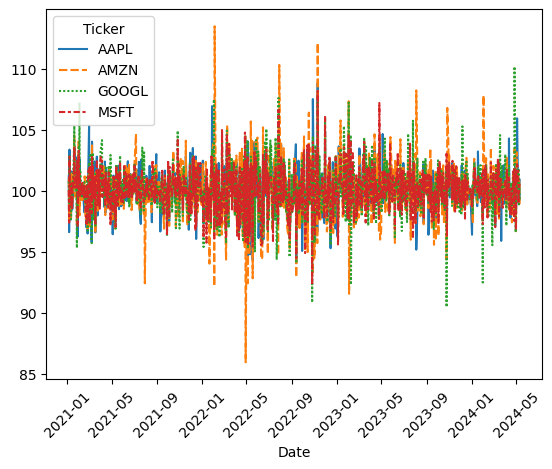

In [79]:
sns.lineplot((df_new / df_new.shift(1)) * 100)
plt.xticks(rotation=45)
plt.show()

In [83]:
df_new / df_new.shift(1) - 1

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.008064,0.000965
2021-01-06,-0.033662,-0.024897,-0.009868,-0.025929
2021-01-07,0.034123,0.007577,0.029869,0.028457
2021-01-08,0.008631,0.006496,0.013239,0.006093
...,...,...,...,...
2024-05-06,-0.009107,0.013372,0.005142,0.016918
2024-05-07,0.003797,0.000318,0.018739,-0.010156
2024-05-08,0.001864,-0.004026,-0.010920,0.002932


In [80]:
df_new.diff(1)

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,1.568108,1.594009,0.695999,0.204132
2021-01-06,-4.322090,-4.006500,-0.858505,-5.492035
2021-01-07,4.233894,1.188995,2.573006,5.871170
2021-01-08,1.107452,1.026993,1.174500,1.292786
...,...,...,...,...
2024-05-06,-1.667725,2.489990,0.860001,6.880005
2024-05-07,0.689041,0.059998,3.149994,-4.200012
2024-05-08,0.339554,-0.759995,-1.869995,1.200012


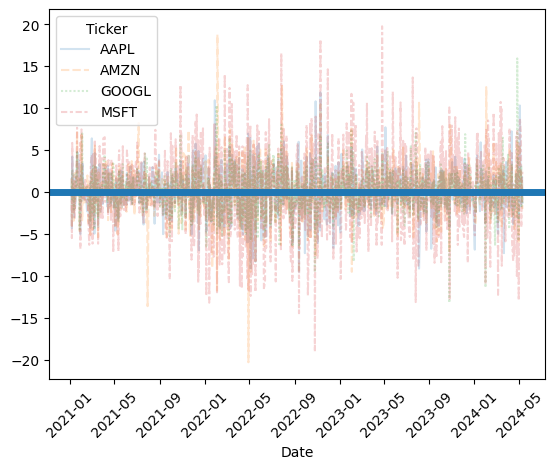

In [77]:
sns.lineplot((df_new - df_new.shift(1)), alpha=0.2)
plt.axhline(0, linewidth=5)
plt.xticks(rotation=45)
plt.show()

In [76]:
# resample и groupby вместе
# https://www.statology.org/pandas-groupby-resample/